In [145]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [139]:
from optimization_target import target_func, FUNC_DOMAIN, FUNC_RANGE, TUNABLE_PARAM_NAME, METRIC_NAME

In [3]:
print(f"x: target_func domain = {FUNC_DOMAIN} :: {TUNABLE_PARAM_NAME}")
print(f"y: target_func range  = {FUNC_RANGE} :: {METRIC_NAME}")

x: target_func domain = (0, 1000000) :: sched_migration_cost_ns
y: target_func range  = (0.2, 1.8) :: Latency, ms


In [4]:
NUM_SAMPLES = 11

In [108]:
df = pandas.DataFrame({"x": [100000, 500000, 750000]})
df["y"] = df.x.apply(target_func)
df

,x,y
0,100000,0.60162
1,500000,0.61250
2,750000,0.80000


In [276]:
kernel = RBF(length_scale=100000, length_scale_bounds="fixed")
gp = GaussianProcessRegressor(kernel=kernel, random_state=42)

gp.fit(df.x.to_numpy().reshape(-1, 1), df.y)

GaussianProcessRegressor(kernel=RBF(length_scale=1e+05), random_state=42)

Check out https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html

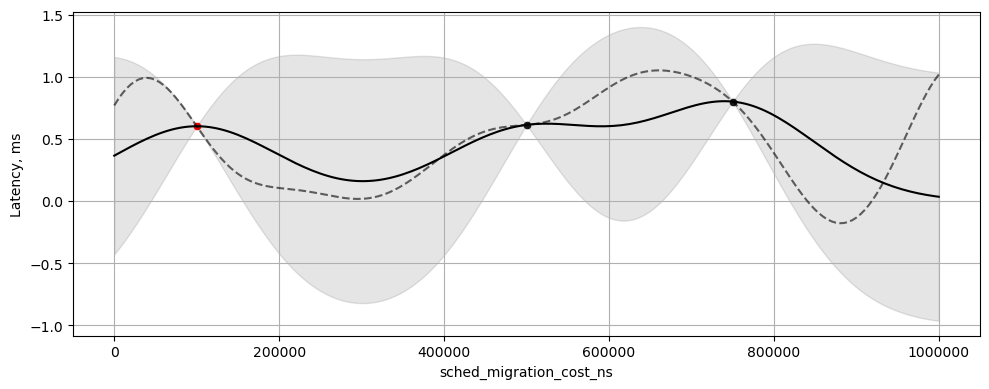

In [282]:
plt.rcParams["figure.figsize"] = (10, 4)

_fig, ax = plt.subplots()

sns.scatterplot(data=df, x="x", y="y", marker='o', color="black", alpha=0.9)
sns.scatterplot(data=df.loc[[df.y.argmin()]], x="x", y="y", marker='o', color="red", alpha=1)

x = np.linspace(0, 1000000, 201).reshape(-1, 1)
y = gp.sample_y(x, random_state=41)
y_mean, y_std = gp.predict(x, return_std=True)

sns.lineplot(x=x[:,0], y=y[:,0], color="black", alpha=0.6, linestyle='--')
sns.lineplot(x=x[:,0], y=y_mean, color="black")
plt.fill_between(x[:,0], y_mean - y_std, y_mean + y_std, alpha=0.1, color="black")

# plt.xlim(-50000, 1050000)
# plt.ylim(0, 2)

plt.ticklabel_format(axis="both", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)

# plt.title("Optimizing Redis performance")
plt.grid()
plt.tight_layout()

plt.savefig("img/sigmod2025_tutorial_02_bo_01_start.png", transparent=False, dpi=300)
plt.show()

In [281]:
gp.alpha

1e-10

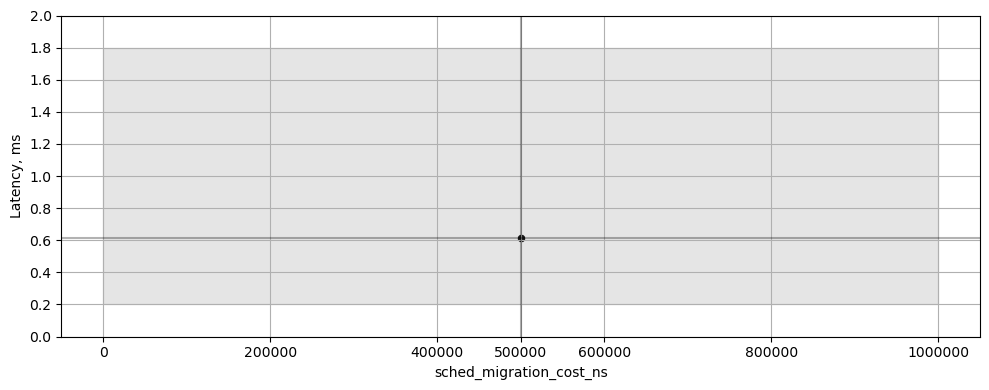

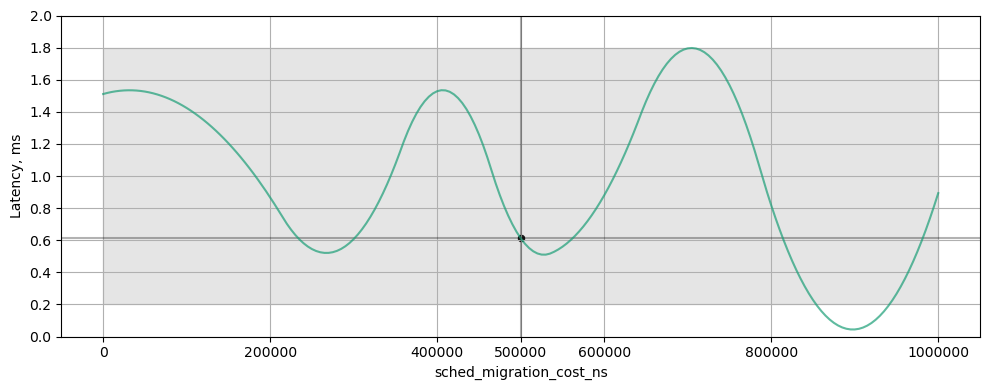

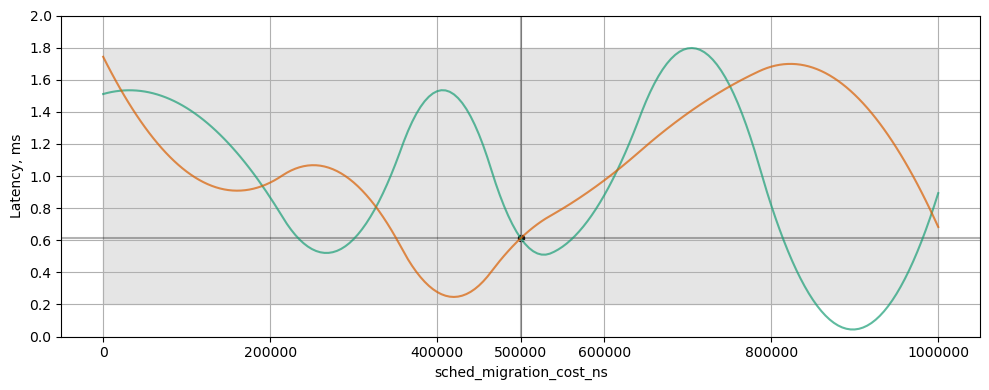

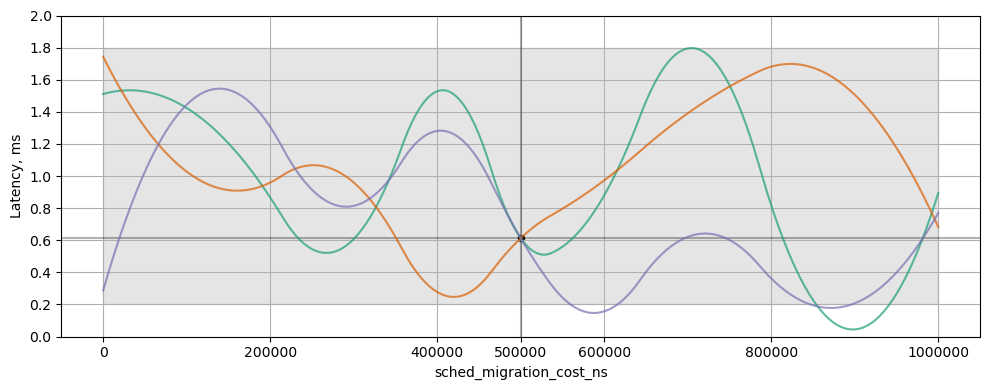

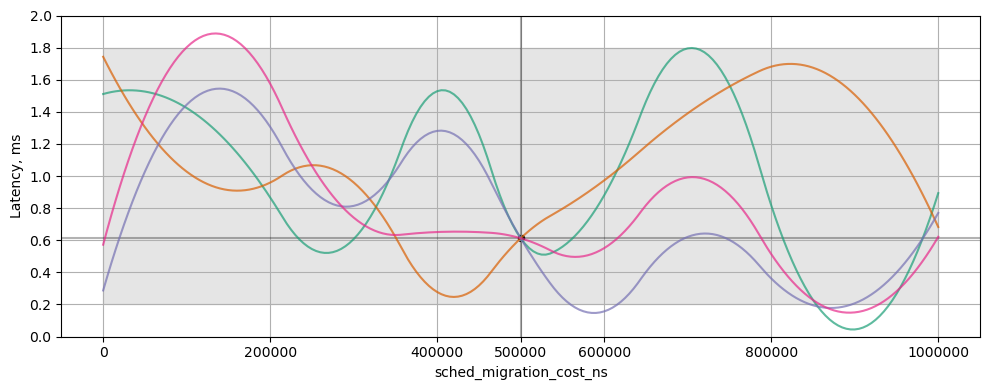

In [78]:

colors_dark2 = [
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#e7298a",
    "#66a61e",
    "#e6ab02",
]

for num_curves in range(5):

    np.random.seed(46)
    plt.rcParams["figure.figsize"] = (10, 4)
    
    _fig, ax = plt.subplots()
    
    ax.add_patch(patches.Rectangle(
        xy=(0, 0.2), width=1000000, height=1.6,
        color="#CCCCCC", alpha=0.5, fill=True,
    ))

    plt.axvline(df.x[0], color="black", alpha=0.3)
    plt.axhline(df.y[0], color="black", alpha=0.3)
    sns.scatterplot(data=df, x="x", y="y", marker='o', color="black", alpha=0.9)

    for i in range(num_curves):
    
        x = np.concatenate([
            np.linspace(0, 1000000, 8),
            df.x.to_numpy(),
        ])
        y = np.concatenate([
            np.random.uniform(low=0.1, high=1.9, size=8),
            df.y.to_numpy(),
        ])
    
        func_interp = interp1d(x, y, kind='quadratic')
        x_interp = np.linspace(0, 1000000, 201)
        y_interp = func_interp(x_interp)
    
        sns.lineplot(x=x_interp, y=y_interp, color=colors_dark2[i], alpha=0.7)
    
    plt.xticks([0, 200000, 400000, 600000, 800000, 1000000] + df.x.to_list())
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    
    plt.xlim(-50000, 1050000)
    plt.ylim(0, 2)
    
    plt.ticklabel_format(axis="both", style="plain")
    
    plt.xlabel(TUNABLE_PARAM_NAME)
    plt.ylabel(METRIC_NAME)
    # plt.title("Optimizing Redis performance")
    plt.grid()
    plt.tight_layout()
    
    plt.savefig(f"img/sigmod2025_tutorial_02_bo_01_default_{num_curves}.png", transparent=False, dpi=300)

plt.show()

In [34]:
np.random.seed(45)

In [9]:
df_rand = pandas.DataFrame({"x": np.random.uniform(*FUNC_DOMAIN, NUM_SAMPLES)})
df_rand["y"] = df_rand.x.apply(target_func)
# df_rand.head(5)

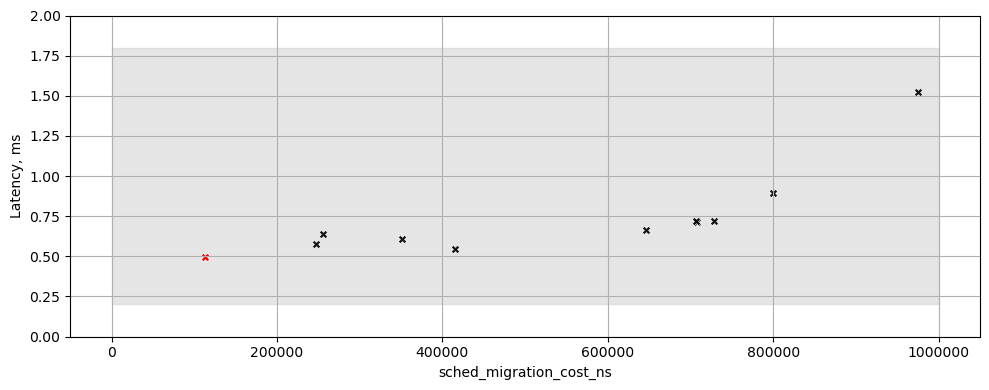

In [10]:
plt.rcParams["figure.figsize"] = (10, 4)

_fig, ax = plt.subplots()

ax.add_patch(patches.Rectangle(
    xy=(0, 0.2), width=1000000, height=1.6,
    color="#CCCCCC", alpha=0.5, fill=True,
))

sns.scatterplot(data=df_rand, x="x", y="y", marker='X', color="black", alpha=0.9)
sns.scatterplot(data=df_rand.loc[[df_rand.y.argmin()]], x="x", y="y", marker='X', color="red", alpha=1)

# Best point from grid search
# sns.scatterplot(data=df_grid.loc[[df_grid.y.argmin()]], x="x", y="y", marker='o', color="red", alpha=1)

x = np.concatenate([df_rand.x.to_numpy(), [df_grid.x[df_grid.y.argmin()]]])
func_interp = interp1d(x, target_func(x), kind='quadratic')
x_interp = np.linspace(x.min(), x.max(), 201)
y_interp = func_interp(x_interp)

# sns.lineplot(x=x_interp, y=y_interp, color="black", alpha=0.6, linestyle='--')

plt.xlim(-50000, 1050000)
plt.ylim(0, 2)

plt.ticklabel_format(axis="x", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)

# plt.title("Optimizing Redis performance")
plt.grid()
plt.tight_layout()

plt.savefig("img/sigmod2025_tutorial_01_grid_03_random.png", transparent=False, dpi=300)
plt.show()

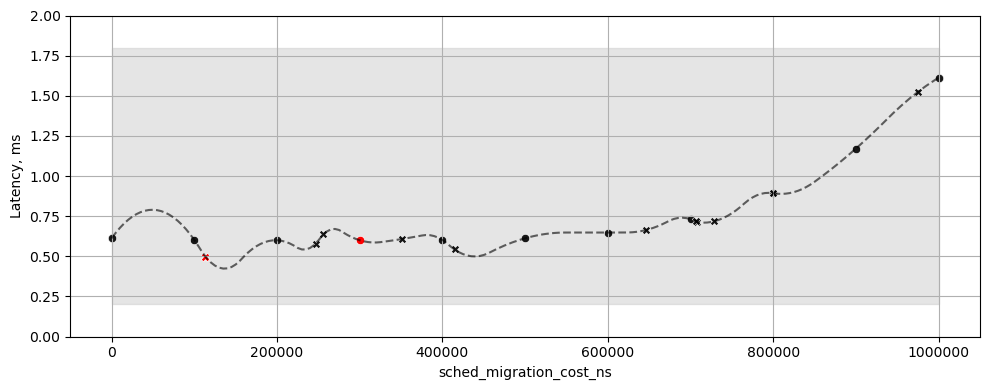

In [11]:
plt.rcParams["figure.figsize"] = (10, 4)

_fig, ax = plt.subplots()

ax.add_patch(patches.Rectangle(
    xy=(0, 0.2), width=1000000, height=1.6,
    color="#CCCCCC", alpha=0.5, fill=True,
))

sns.scatterplot(data=df_grid, x="x", y="y", marker='o', color="black", alpha=0.9)
sns.scatterplot(data=df_grid.loc[[df_grid.y.argmin()]], x="x", y="y", marker='o', color="red", alpha=1)

sns.scatterplot(data=df_rand, x="x", y="y", marker='X', color="black", alpha=0.9)
sns.scatterplot(data=df_rand.loc[[df_rand.y.argmin()]], x="x", y="y", marker='X', color="red", alpha=1)

x = np.concatenate([df_grid.x, df_rand.x])
func_interp = interp1d(x, target_func(x), kind='quadratic')
x_interp = np.linspace(x.min(), x.max(), 201)
y_interp = func_interp(x_interp)

sns.lineplot(x=x_interp, y=y_interp, color="black", alpha=0.6, linestyle='--')

plt.xlim(-50000, 1050000)
plt.ylim(0, 2)

plt.ticklabel_format(axis="x", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)

# plt.title("Optimizing Redis performance")
plt.grid()
plt.tight_layout()

# plt.savefig("img/sigmod2025_tutorial_01_grid_04_all.png", transparent=False, dpi=300)
plt.savefig("img/sigmod2025_tutorial_01_grid_05_all_interp.png", transparent=False, dpi=300)
plt.show()